In [10]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread('./train/images/image_1.png')

print("Original:")
# ia.imshow(image)

Original:


In [8]:
import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil

In [9]:
# load images as NumPy arrays and append them to images list
images = []
for index, file in enumerate(glob.glob('./train/images/*.png')):
    images.append(imageio.imread(file))
    
# how many images we have
print('We have {} images'.format(len(images)))

We have 3 images


In [117]:
# what are the sizes of the images
for index, file in enumerate(glob.glob('./train/images/*.png')):
    print('Image {} have size of {}'.format(file[3:], images[index].shape))

Image rain/images/image_1.png have size of (1350, 2358, 4)
Image rain/images/image_4.png have size of (1426, 1736, 4)
Image rain/images/image_7.png have size of (1350, 2358, 4)


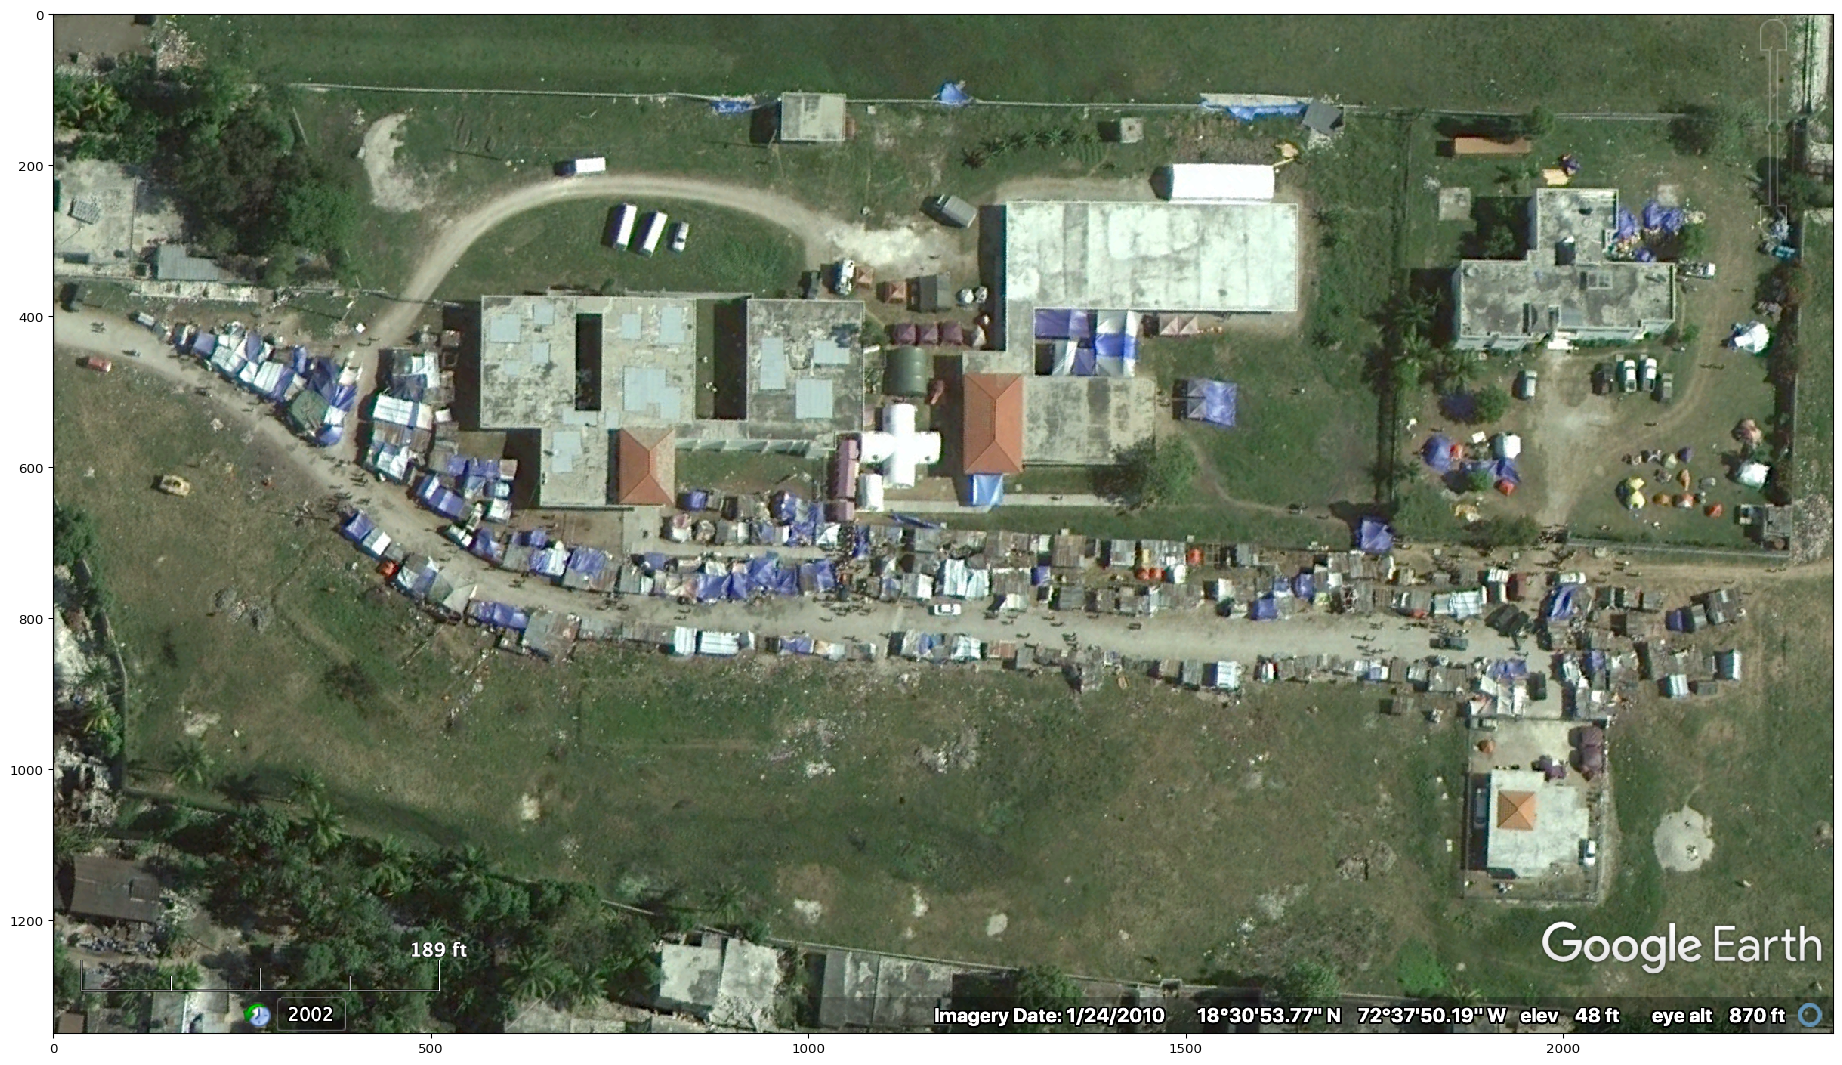

In [15]:
ia.imshow(images[0])

In [21]:
# XML file names correspond to the image file names
for index, file in enumerate(glob.glob('./train/annotations/*.xml')):
    print(file[1:])

/train/annotations/image_1.xml
/train/annotations/image_4.xml
/train/annotations/image_7.xml


In [27]:
# # have a look how one of the XML annotation file looks like
# # notice how it has 2 bounding boxes with red pandas
# shutil.copy('train/annotations/image_1.xml', 'train/annotations/image_1.txt')
# annotation_text = open("train/annotations/image_1.txt", "r")
# print(annotation_text.read())
# annotation_text.close()

In [28]:
# Function that will extract column data for our CSV file
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [29]:
# apply xml_to_csv() function to convert all XML files in images/ folder into labels.csv
labels_df = xml_to_csv('train/annotations/')
labels_df.to_csv(('labels.csv'), index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [30]:
# in the previuos cell we also put all annotation in labels_df
# let's see what's inside
# each bounding box has a separate row
labels_df

filename  width  height  class  xmin  ymin  xmax  ymax
0    image_1.png   2358    1350   tent   180   417   220   456
1    image_1.png   2358    1350   tent   264   453   306   507
2    image_1.png   2358    1350   tent   313   494   364   563
3    image_1.png   2358    1350   tent   418   500   484   556
4    image_1.png   2358    1350   tent   377   650   427   704
..           ...    ...     ...    ...   ...   ...   ...   ...
391  image_7.png   2358    1350  grass  1790   812  1856   888
392  image_7.png   2358    1350  grass  1566   824  1647   895
393  image_7.png   2358    1350   road   444   256   529   484
394  image_7.png   2358    1350   road   427    14   485   229
395  image_7.png   2358    1350   road   480   500   541   723

[396 rows x 8 columns]

In [31]:
# start by groupping each image bounding boxes coordinates
# separate dataframes are formed based on the filename
grouped = labels_df.groupby('filename')

In [32]:
# we can pull each group with get_group() using the filename
group_df = grouped.get_group('image_1.png')
group_df = group_df.reset_index()
group_df = group_df.drop(['index'], axis=1)
group_df

filename  width  height class  xmin  ymin  xmax  ymax
0    image_1.png   2358    1350  tent   180   417   220   456
1    image_1.png   2358    1350  tent   264   453   306   507
2    image_1.png   2358    1350  tent   313   494   364   563
3    image_1.png   2358    1350  tent   418   500   484   556
4    image_1.png   2358    1350  tent   377   650   427   704
..           ...    ...     ...   ...   ...   ...   ...   ...
139  image_1.png   2358    1350  tent  1098   346  1135   387
140  image_1.png   2358    1350  tent  1055   331  1095   370
141  image_1.png   2358    1350  tent  2025   837  2062   874
142  image_1.png   2358    1350  tent  2058   794  2113   823
143  image_1.png   2358    1350  tent  1819   855  1873   904

[144 rows x 8 columns]

In [93]:
# get bounding boxes coordinates from grouped data frame and write into array        
bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
# display the array we've got
bb_array.shape

(144, 4)

In [134]:
bb_array[0]

array([180, 417, 220, 456])

In [129]:
images[0].shape

(1350, 2358, 4)

In [130]:
# pass the array of bounding boxes coordinates to the imgaug library
bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array,  shape=images[0].shape)

In [131]:
bbs[0]

BoundingBox(x1=180.0000, y1=417.0000, x2=220.0000, y2=456.0000, label=None)

In [133]:
# display the image and draw bounding boxes
ia.imshow(bbs[0].draw_on_image(images[0], size = 2))

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (162,4)